# Volume 4: Stochastic Differential Equations

# Name: Ethan Williams
# Class: Section 1?
# Date: December 5th

In [1]:
"""Volume 4. Stochastic Differential Equations."""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import linalg as la

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


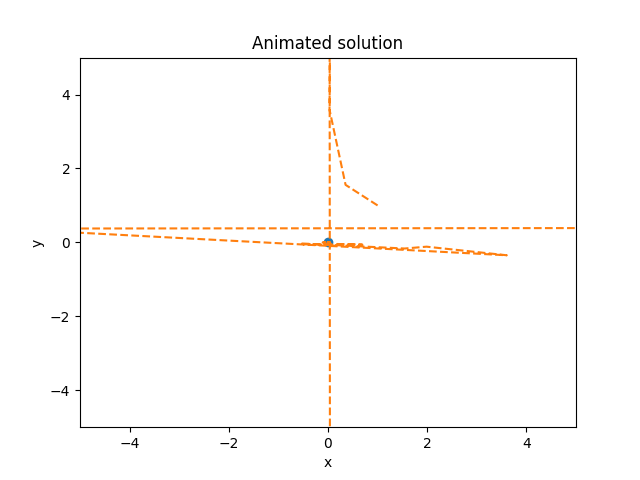

In [4]:
# Problem 1
def brownian_motion(g,y0,t):
    """
    Use the concepts of Brownian motion to
    generate animation of particle randomly moving
    
    Parameters:
        g (func): scalar function
        y0 (ndarray (2,)): inital condition
        t (ndarray): time points
    """
    S = y0
    #start the list of the values with the initial value
    slist = [y0]
    #for every time step calculate the new S value
    for time in t:
        S = S + g(time,S)*S@np.array([[np.random.normal(),0],[0,np.random.normal()]])
        #append the S value to a list
        slist.append(S)
    #return the list of the x,y values
    return slist
#get the results of the brownian motion
g = lambda x,y: 1
t = np.linspace(0,100,100)
result = brownian_motion(g,np.array([1,1]),np.linspace(0,100,100))
#separate the x values and y values of the brownian motion
xs = np.array([x[0] for x in result])
ys = np.array([x[1] for x in result])

#plot the animation of the brownian motion results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-5,5))
ax.set_ylim((-5,5))
dot1, = ax.plot([],[],'-o')
line, = ax.plot([],[],'--')
def init():
    dot1.set_data([],[])
    line.set_data([],[])
    return dot1,line,
def update(a):
    dot1.set_data(xs[a],ys[a])
    line.set_data(xs[:a],ys[:a])
    return dot1,line,
plt.title("Animated solution")
plt.xlabel("x")
plt.ylabel("y")

ani = animation.FuncAnimation(fig, update,init_func=init, frames=100,blit=True,interval=100)


<IPython.core.display.Javascript object>


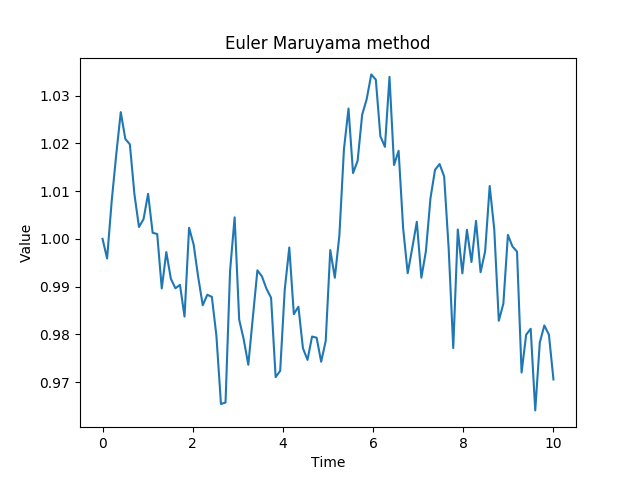

In [58]:
# Problem 2
def euler_maruyama(f,g,y0,t):
    """
    Use the Euler-Maruyama method to predict
    the future n observations of the SDE
        dS = S\mu(t)dt + S\sigma(t)dW

    Parameters:
        f (function): number of future observations
        g (function): mu of dS/S
        sigma (float): sigma of dS/S
        y0 (ndnarray (mx1) or float or int): initial data point

    Returns:
       sol (ndarray (m,n)): future observations
    """
    #set the initial value
    S = y0
    #start the list that will hold the values of S over time
    slist = [y0]
    dt = t[1]-t[0]
    for time in t:
        #calculate the S value for the next step
        S = S + f(t,S)*S*dt +g(time,S)*S*np.random.normal(0,dt)
        #append the value to the list
        slist.append(S)
    #return the values matching up with the time steps
    return slist

f = lambda x,y: 1-(y**2)
g = lambda x,y: .1
time = np.linspace(0,10,100)
#run the euler maruyama method with our funcitons f and g
result = euler_maruyama(f,g,1.,time)
#plot the results
plt.plot(time,result[:100])
plt.title("Euler Maruyama method")
plt.ylabel("Value")
plt.xlabel("Time")
plt.show()

In [ ]:
# Problem 3
def theta(data):
    """
    Calculate MAP of mu and sigma.

    Parameters:
        data (str): filename of historical data
    
    Returns:
        mu (ndarray): mean of data
        sigma (ndarray): standard deviation of data
    """
    pass

In [ ]:
# Problem 4
def prob4(iters=1000):
    """
    Use the Euler-Maruyama method on historical Google stock data.
    Run the method 1000 times and plot the average predict stock value
    for the next n values

    Parameters:
        n (int): number of predicted values
        iterations (int): number of iterations
    """
    pass

In [ ]:
def convergence(iters = 1000):
    """
    Show convergence of EM
    
    Parameters:
        iters (int): number of times to calculate difference
    """
    pass